# Laboratorio 2 - Clasificacion de rotulos de trafico utilizando CNN Le-Net
Andrés de la Roca  
Jun Woo Lee

In [196]:
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


## Preparacion de datos

In [197]:
dir_datos = './Datos_Rotulos_Trafico'

In [198]:
os.listdir(dir_datos)

['entrenamiento.p', 'prueba.p', 'validacion.p']

In [199]:
train_route = dir_datos + '/entrenamiento.p'
test_route = dir_datos + '/prueba.p'
validation_route = dir_datos + '/validacion.p'

In [200]:
train_data = pd.read_pickle(train_route)
test_data = pd.read_pickle(test_route)
validation_data = pd.read_pickle(validation_route)

In [201]:
train_images = train_data['features']
labels = train_data['labels']
# test_features = test_data['features']
# validation_features = validation_data['features']

In [202]:
print(train_images.shape)
print(labels.shape)
# print(test_features.shape)
# print(validation_features.shape)

(34799, 32, 32, 3)
(34799,)


In [203]:
from sklearn.model_selection import train_test_split

train_images = train_images.astype(np.float32) / 255.0

# Creacion de variables de entrenamiento, validacion y testeo. Contando imagenes y etiquetas
train_features, test_features, train_labels, test_labels = train_test_split(train_images, labels, test_size=0.2, random_state=42)
train_feautres, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)


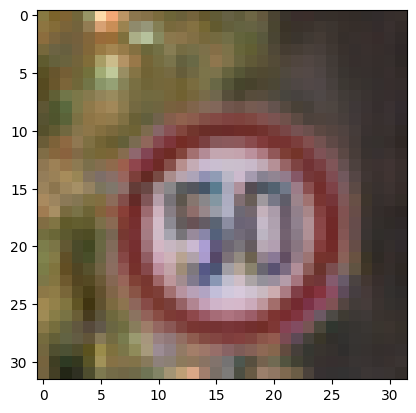

In [204]:
plt.imshow(train_features[0])


### Generacion de imagenes al azar

In [205]:
# forma_imagen = (32, 32, 3)

# from keras.preprocessing.image import ImageDataGenerator

# gen_imagen = ImageDataGenerator(rotation_range = 0, # rotar la imagen 0 grados
#                                width_shift_range = 0.10, # Desplazar el ancho de la imagen por un max de 5%
#                                height_shift_range = 0.10, # Desplazar la altura de la imagen por un max de 5%
#                                #rescale = 1 / 255, # Normalizar la imagen, en este caso ya están normalizadas
#                                shear_range = 0.1, # Shear quiere decir cortar parte de la imagen (max 10%)
#                                zoom_range = 0.1, # Zoom por 10% max
#                                horizontal_flip = False, # voltear la imagen sobre el eje horizontal
#                                fill_mode = 'nearest' # Llenar los pixels faltantes con el valor existente más cercano
#                               )

In [206]:
# def Generator(File_address, Batch_Size):
#     while True:
#       pickle_data = []
#       with (open("myfile", "rb")) as openfile: #Read pickle file. this is a sample. you can use your way to read the pickle file.
#           while True:
#               pickle_data.append(pickle.load(File_address))
      
#       for B in range(0, len(pickle_data), Batch_Size):
#           X = pickle_data[B:B+Batch_Size]
#           Y = Labels[B:B+Batch_Size] #Define your labels
#           yield X, Y #Returning data for training.

In [207]:
# train_gen = Generator(train_route, 50000)
# test_gen = Generator(test_route, 50000)
# validation_gen = Generator(validation_route, 50000)

## Creacion Modelo

In [208]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [209]:
modelo = Sequential()

modelo.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32,32,3)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Conv2D(16, (5, 5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Flatten())
modelo.add(Dense(120, activation='relu'))
modelo.add(Dense(84, activation='relu'))
modelo.add(Dense(43, activation='softmax')) # Traffic sign classes = 43

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 400)               0         
                                                                 
 dense_39 (Dense)            (None, 120)             

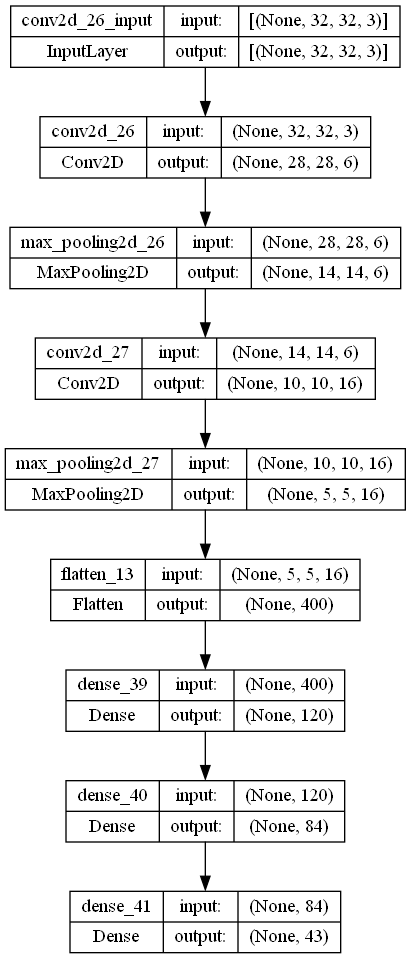

In [210]:
from keras.utils import plot_model
plot_model(modelo, to_file='model.png', show_shapes=True, show_layer_names=True)

In [211]:
from keras.callbacks import EarlyStopping

deteccion_temprana = EarlyStopping(monitor='val_loss', patience=2)

## Entrenamiento de Modelo

In [212]:
import warnings
warnings.filterwarnings('ignore')

In [213]:
from keras.models import load_model
modelo.save('detector_de_senales.h5') #Guardamos el modelo

(27839, 32, 32, 3) (27839,) (6960, 32, 32, 3) (6960,)
Epoch 1/10
435/435 [==============================] - 5s 10ms/step - loss: 1.7118 - accuracy: 0.5376 - val_loss: 0.7068 - val_accuracy: 0.7881
Epoch 2/10
435/435 [==============================] - 4s 10ms/step - loss: 0.4503 - accuracy: 0.8759 - val_loss: 0.3417 - val_accuracy: 0.9063
Epoch 3/10
435/435 [==============================] - 4s 10ms/step - loss: 0.2577 - accuracy: 0.9298 - val_loss: 0.2848 - val_accuracy: 0.9144
Epoch 4/10
435/435 [==============================] - 5s 11ms/step - loss: 0.1722 - accuracy: 0.9557 - val_loss: 0.2004 - val_accuracy: 0.9474
Epoch 5/10
435/435 [==============================] - 5s 11ms/step - loss: 0.1342 - accuracy: 0.9655 - val_loss: 0.1840 - val_accuracy: 0.9546
Epoch 6/10
435/435 [==============================] - 5s 11ms/step - loss: 0.1019 - accuracy: 0.9728 - val_loss: 0.1483 - val_accuracy: 0.9648
Epoch 7/10
435/435 [==============================] - 5s 11ms/step - loss: 0.0769 - accu

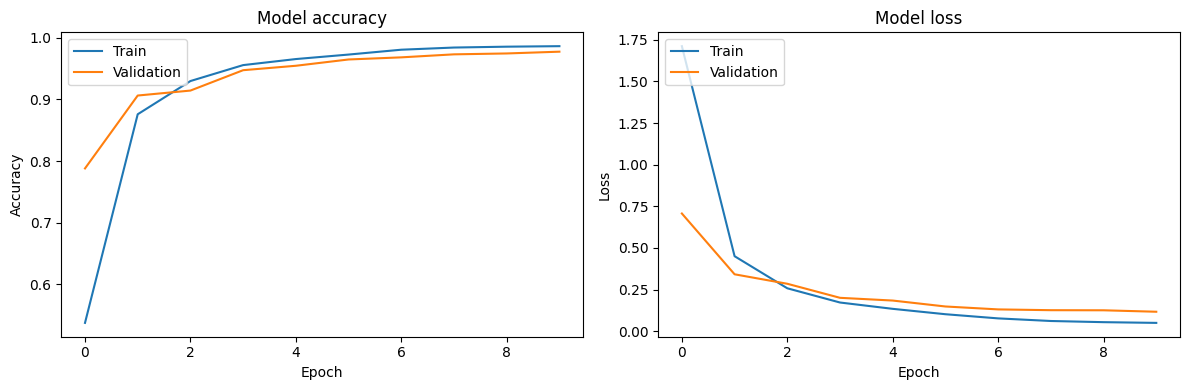

In [214]:
features = train_data['features'].astype(np.float32) / 255.0
labels = train_data['labels']

X_train, X_val, y_train, y_val = train_test_split(features, labels, train_size=27839, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

learning_rate = 0.001  # Hyperparameter: Learning rate
epochs = 10            # Hyperparameter: Number of epochs
batch_size = 64        # Hyperparameter: Batch size


optimizer = Adam(lr=learning_rate)
modelo.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

deteccion_temprana = EarlyStopping(monitor='val_loss', patience=2)
history = modelo.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_val, y_val), callbacks=[deteccion_temprana])

modelo.save('detector_de_senales.h5')


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


## Analisis

218/218 [==============================] - 1s 2ms/step
Accuracy: 0.9774

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      0.98      0.99       425
           2       0.98      0.98      0.98       394
           3       1.00      0.84      0.91       242
           4       0.99      1.00      0.99       373
           5       0.91      0.96      0.93       338
           6       0.97      1.00      0.98        56
           7       0.97      0.99      0.98       242
           8       0.99      0.98      0.99       237
           9       0.97      1.00      0.98       253
          10       0.98      1.00      0.99       332
          11       0.97      0.97      0.97       229
          12       1.00      1.00      1.00       417
          13       0.99      0.99      0.99       386
          14       1.00      0.99      1.00       130
          15       0.98      0.95      0.97       125
        

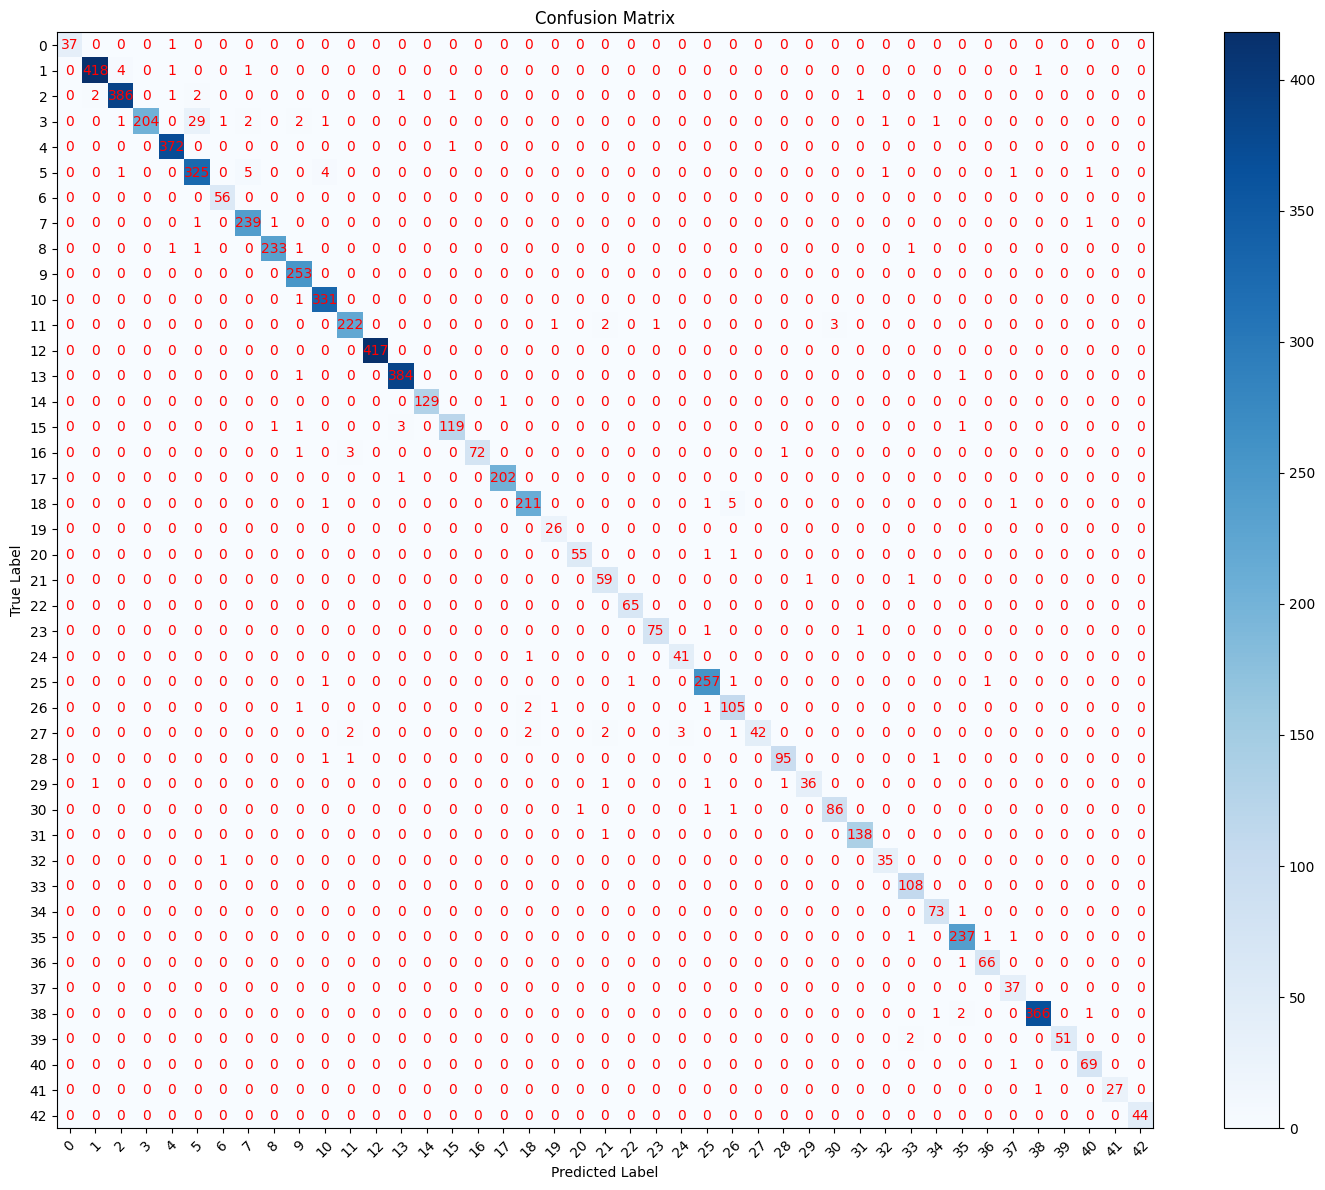

In [215]:

y_pred = modelo.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)


accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}\n")

report = classification_report(y_val, y_pred_classes, target_names=[str(i) for i in range(43)])
print(report)


confusion_mtx = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(15, 12))
plt.imshow(confusion_mtx, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(43)
plt.xticks(tick_marks, [str(i) for i in range(43)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(43)])
for i in range(43):
    for j in range(43):
        plt.text(j, i, confusion_mtx[i, j], ha='center', va='center', color='red')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
